**The Major Assumption with this strategy are as follows:**
1. The distribution should be Normally Distributed.
2. The distribution should be close to Normal Distribution.

The values below mean - 3sigma and more than mean + 3sigma is considered as Outliers.
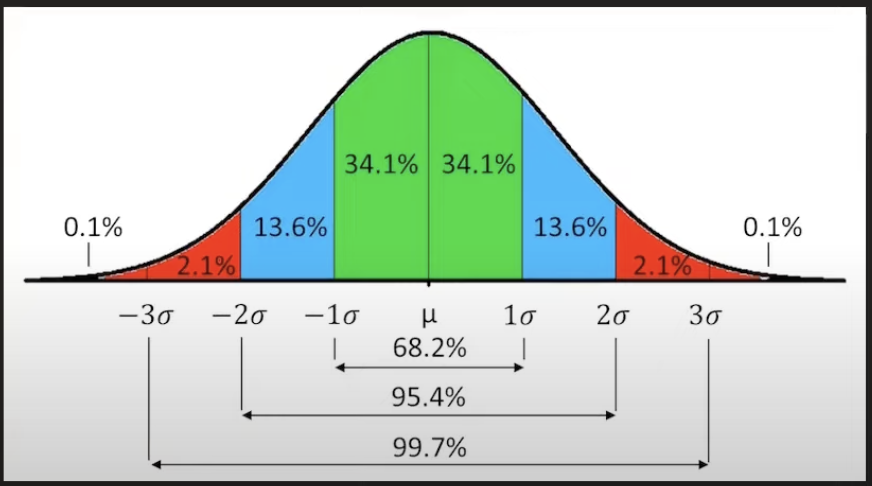

## What is Z-score?

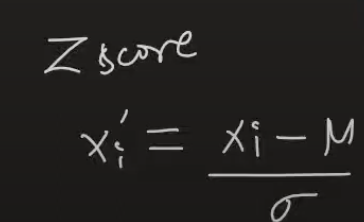

## Outlier Treatment

- Trimming -> Removing the outlier records. It is mainly used when we have less number of outliers.
- Capping -> Capping the values. It is used when we have high number of outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

In [4]:
df.isnull().mean()

cgpa                    0.0
placement_exam_marks    0.0
placed                  0.0
dtype: float64

/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_78294/316248929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_78294/316248929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


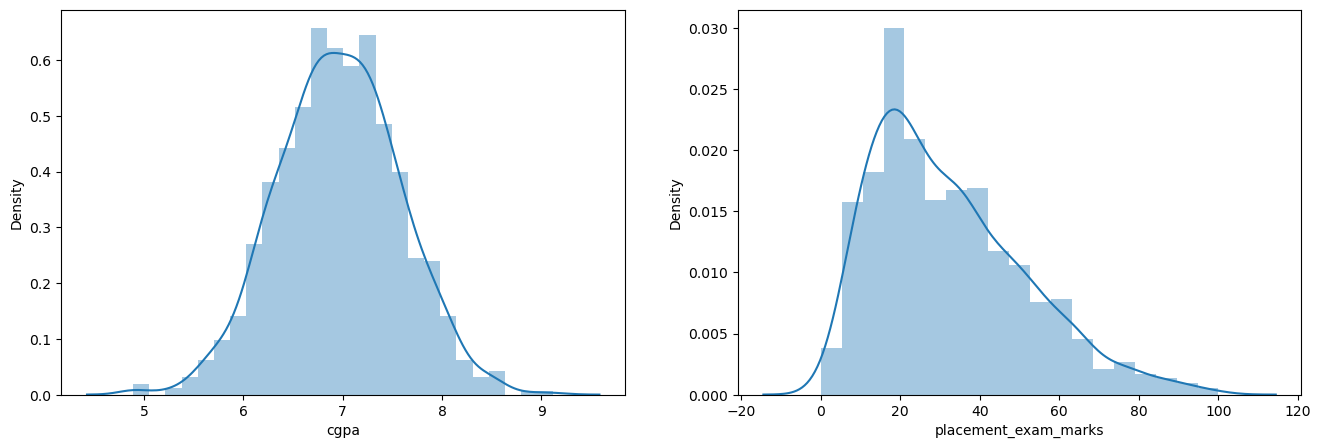

In [7]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])

plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])

plt.show()

Based on seeing the above distribution, we can conclude that the z_score method would be applicable in CGPA only.

In [9]:
print("CGPA")

print("mean", df['cgpa'].mean())
print("Std", df['cgpa'].std())
print("Min", df['cgpa'].min())
print("Max", df['cgpa'].max())

CGPA
mean 6.96124
Std 0.6158978751323894
Min 4.89
Max 9.12


In [10]:
# Defining Range of outlier detection
print("Highest allowded",(df['cgpa'].mean() + 3*df['cgpa'].std()) )
print("Lowest allowded",(df['cgpa'].mean() - 3*df['cgpa'].std()) )

Highest allowded 8.808933625397168
Lowest allowded 5.113546374602832


In [12]:
# Detecting the outliers
df[(df['cgpa'] > 8.8) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

# Trimming

In [15]:
# Trimming

new_df = df[(df['cgpa'] < 8.8) & (df['cgpa'] > 5.11)]

In [16]:
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

In [17]:
# Approach 2

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [18]:
df.sample(5)

cgpa  placement_exam_marks  placed  cgpa_zscore
461  7.39                  12.0       0     0.696154
98   8.12                  76.0       0     1.881416
688  6.59                  36.0       0    -0.602762
855  7.89                   9.0       1     1.507977
239  6.71                  16.0       1    -0.407925

In [20]:
df[(df['cgpa_zscore'] < -3) | (df['cgpa_zscore'] >3)]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

## Capping

In [21]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [22]:
upper_limit

8.808933625397168

In [23]:
lower_limit

5.113546374602832

np.where(x, y, z)
x = condition
y = value if true
z =. value if false

In [24]:
df['cgpa'] = np.where(df['cgpa'] > upper_limit, upper_limit,
                     np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa']))

In [27]:
df[(df['cgpa'] > upper_limit) | (df['cgpa'] < lower_limit)]

Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed, cgpa_zscore]
Index: []

/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_78294/316248929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/var/folders/_m/_0hzmbf1467gxwxv0b95v6_80000gn/T/ipykernel_78294/316248929.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


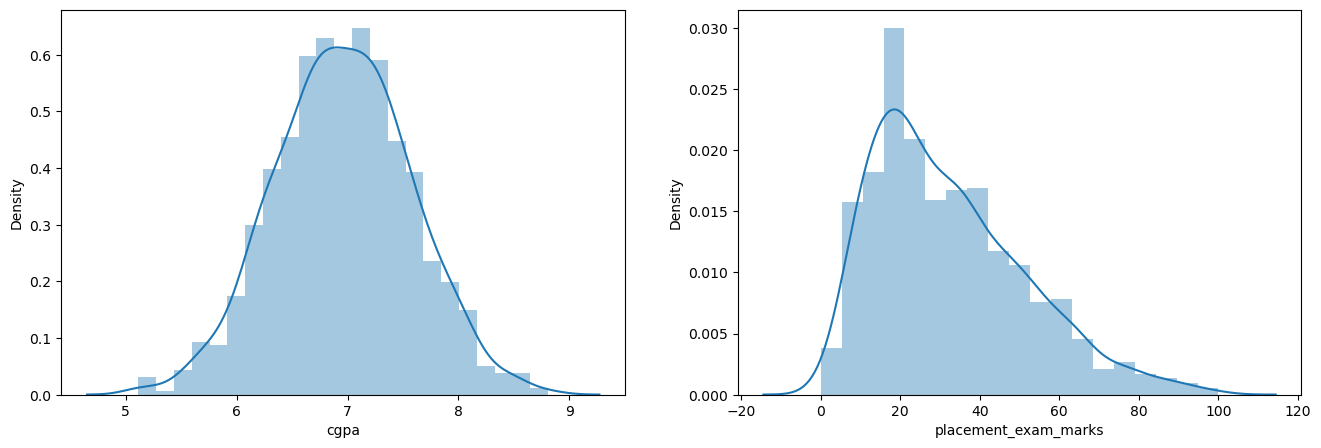

In [28]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])

plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [29]:
df.describe()

cgpa  placement_exam_marks       placed   cgpa_zscore
count  1000.000000           1000.000000  1000.000000  1.000000e+03
mean      6.961499             32.225000     0.489000 -1.474376e-16
std       0.612688             19.130822     0.500129  1.000000e+00
min       5.113546              0.000000     0.000000 -3.362960e+00
25%       6.550000             17.000000     0.000000 -6.677081e-01
50%       6.960000             28.000000     0.000000 -2.013321e-03
75%       7.370000             44.000000     1.000000  6.636815e-01
max       8.808934            100.000000     1.000000  3.505062e+00